### A simple linear network for MNIST dataset, including only one hidden layer

In [2]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

In [3]:
x_train = idx2numpy.convert_from_file('mnist/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('mnist/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('mnist/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('mnist/t10k-labels.idx1-ubyte')

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_data = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).long())
test_data = TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).long())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-3)

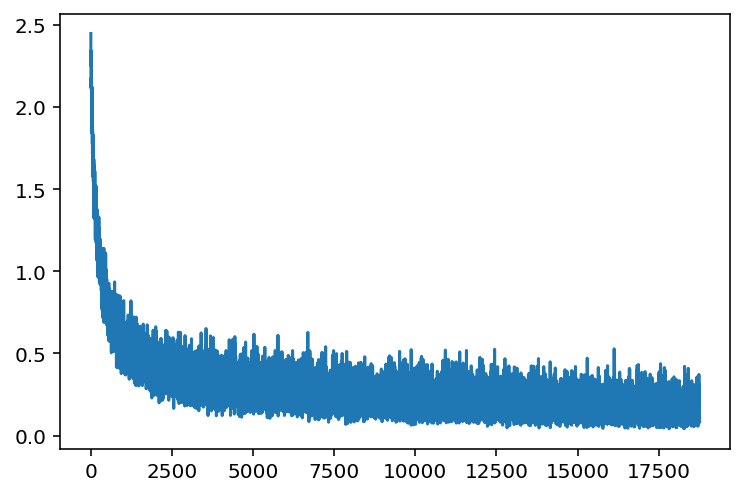

In [6]:
# train 

epoch = 20
loss_his = []

for i in range(epoch):
    for x, y in train_loader:
        y_hat = net(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

In [12]:
#test

correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        y_hat = net(x)
        _, predicted = torch.max(y_hat.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f%%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 94.68%
